<a id='top'></a>
# Project: Investigating TMDP-Movies Dataset.

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

I will be analyizing this dataset to find some information about the most popular genres each year and some relations between budget and cast team and their effect on the revenue.

## Asking questions
<ul>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>Are generes related to budget?</li>
<li>is there a relation between directors, budget and revenue?</li>
<li>does the cast affect the budget and revenue?</li>
</ul>

### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

#### Inspecting and Assessing the data

In [2]:
# loading the data from .csv file
df = pd.read_csv('Raw_Data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df['keywords'][0]

'monster|dna|tyrannosaurus rex|velociraptor|island'

In [5]:
df['overview'][0]

'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.'

In [6]:
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


## note:

### the data is precleaned and ready to be analyized with just a few changes

## what needs to be cleaned:

- unnecessary homepage column
- unnecessary tagline column
- unnecessary release_date column
- unnecessary keywords column
- reordering the columns to be more readable
- id column needs to be a string type
- genres column needs to be a string type
- imdb_id column has 'tt' in each cell
- one duplicate found
- new column for profit = revenue - budget

### Data Cleaning

- creating a copy to work on and droping unnecessary columns

In [7]:
# function to turn float numbers of dollars more readable and easy for the eyes.
def float_formatting(f):
    '''takes a float number and splits it to 3 digit parts then joins them with , in between prefixed with $ sign
    * returns a string in dollars format'''
    # first we reverse the string of the rounded float so we count the 3 digits from the ones side.
    f = str(round(f))[::-1]
    # 2nd we split the string into 3 digits groups
    digits = [f[i:i+3] for i in range(0, len(f), 3)]
    # 3rd we join them separated by , and prefixed with $
    f = '$' + ','.join(digits)[::-1]
    # then we return the dollars string format
    return f

In [8]:
# using pandas copy() function to create a separate copy of the orginal dataframe to work on 
copy_df = df.copy()
# droping unnecessary columns
copy_df.drop(columns=['id', 'imdb_id', 'homepage', 'tagline', 'release_date', 'keywords', 'budget_adj', 'revenue_adj',
                      'overview', 'production_companies'], inplace=True)

# and another dataframe to display more readable data of the orginal dataframe
view_df = df.copy()
# droping unnecessary columns
view_df.drop(columns=['homepage', 'tagline', 'release_year', 'keywords', 'budget_adj', 'revenue_adj', 'overview',
                      'production_companies'], inplace=True)
# using the float_formatting function to have a better look on the revenue and budget
view_df[['budget', 'revenue']] = view_df[['budget', 'revenue']].applymap(float_formatting)

In [9]:
view_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average
0,135397,tt0369610,32.985763,"$150,000,000","$1,513,528,810",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5


In [10]:
copy_df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


- reordering the columns to be more readable

In [11]:
# creating a list of the wanted oreders
new_orders = ['original_title', 'release_year', 'genres', 'runtime', 'cast', 'director', 'popularity', 'vote_count',
              'vote_average', 'budget', 'revenue']

# looping over each column and placing it in the wanted order
order = 0
for column in new_orders:
    copy_df.insert(order, column + '_', copy_df[column])
    copy_df.drop(columns=[column], inplace=True)
    copy_df.rename(columns={column + '_': column}, inplace=True)
    order += 1

# deleting extra variables
del new_orders, order

In [12]:
copy_df.head(1)

,original_title,release_year,genres,runtime,cast,director,popularity,vote_count,vote_average,budget,revenue
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763,5562,6.5,150000000,1513528810


In [13]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   release_year    10866 non-null  int64  
 2   genres          10843 non-null  object 
 3   runtime         10866 non-null  int64  
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   popularity      10866 non-null  float64
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   budget          10866 non-null  int64  
 10  revenue         10866 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


In [14]:
# creating a list of the wanted oreders
new_orders = ['original_title', 'release_date', 'genres', 'runtime', 'cast', 'director', 'popularity', 'vote_count',
              'vote_average', 'budget', 'revenue']

# looping over each column and placing it in the wanted order
order = 2
for column in new_orders:
    view_df.insert(order, column + '_', view_df[column])
    view_df.drop(columns=[column], inplace=True)
    view_df.rename(columns={column + '_': column}, inplace=True)
    order += 1

# deleting extra variables
del new_orders, order

In [15]:
# function thats makes sure that the years before 2000 inside release date gets padded with 19 instead of 20
def pad(date):
    date_elements = date.split('/')
    if int(date_elements[2]) > 15:
        date_elements[2] = '19' + date_elements[2]
    else:
        date_elements[2] = '20' + date_elements[2]
        
    date = '/'.join(date_elements)
    return date
        
view_df['release_date'] = view_df['release_date'].apply(pad)

# converting the release_date column into date_time object 
view_df['release_date'] = pd.to_datetime(view_df['release_date'])

In [16]:
view_df

,id,imdb_id,original_title,release_date,genres,runtime,cast,director,popularity,vote_count,vote_average,budget,revenue
0,135397,tt0369610,Jurassic World,2015-06-09,Action|Adventure|Science Fiction|Thriller,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763,5562,6.5,"$150,000,000","$1,513,528,810"
1,76341,tt1392190,Mad Max: Fury Road,2015-05-13,Action|Adventure|Science Fiction|Thriller,120,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,28.419936,6185,7.1,"$150,000,000","$378,436,354"
2,262500,tt2908446,Insurgent,2015-03-18,Adventure|Science Fiction|Thriller,119,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,13.112507,2480,6.3,"$110,000,000","$295,238,201"
3,140607,tt2488496,Star Wars: The Force Awakens,2015-12-15,Action|Adventure|Science Fiction|Fantasy,136,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,11.173104,5292,7.5,"$200,000,000","$2,068,178,225"
4,168259,tt2820852,Furious 7,2015-04-01,Action|Crime|Thriller,137,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,9.335014,2947,7.3,"$190,000,000","$1,506,249,360"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,The Endless Summer,1966-06-15,Documentary,95,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,0.080598,11,7.4,$0,$0
10862,20379,tt0060472,Grand Prix,1966-12-21,Action|Adventure|Drama,176,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,0.065543,20,5.7,$0,$0
10863,39768,tt0060161,Beregis Avtomobilya,1966-01-01,Mystery|Comedy,94,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,0.065141,11,6.5,$0,$0
10864,21449,tt0061177,"What's Up, Tiger Lily?",1966-11-02,Action|Comedy,80,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,0.064317,22,5.4,$0,$0


- removing 'tt' from imdb_id column

In [17]:
view_df['imdb_id'] = view_df['imdb_id'].astype(str).apply(lambda x: x[2:])

In [18]:
view_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   imdb_id         10866 non-null  object        
 2   original_title  10866 non-null  object        
 3   release_date    10866 non-null  datetime64[ns]
 4   genres          10843 non-null  object        
 5   runtime         10866 non-null  int64         
 6   cast            10790 non-null  object        
 7   director        10822 non-null  object        
 8   popularity      10866 non-null  float64       
 9   vote_count      10866 non-null  int64         
 10  vote_average    10866 non-null  float64       
 11  budget          10866 non-null  object        
 12  revenue         10866 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 1.1+ MB


- changing columns types to the most fitting types

In [19]:
# zero padding for consistency
view_df['id'] = view_df['id'].astype('str').apply(lambda x: x.zfill(6))

In [20]:
# converting genres to string type
copy_df['genres'] = copy_df['genres'].astype('str')
view_df['genres'] = view_df['genres'].astype('str')

In [21]:
copy_df.head(1)

,original_title,release_year,genres,runtime,cast,director,popularity,vote_count,vote_average,budget,revenue
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763,5562,6.5,150000000,1513528810


In [22]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   release_year    10866 non-null  int64  
 2   genres          10866 non-null  object 
 3   runtime         10866 non-null  int64  
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   popularity      10866 non-null  float64
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   budget          10866 non-null  int64  
 10  revenue         10866 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


In [23]:
view_df.head(1)

,id,imdb_id,original_title,release_date,genres,runtime,cast,director,popularity,vote_count,vote_average,budget,revenue
0,135397,0369610,Jurassic World,2015-06-09,Action|Adventure|Science Fiction|Thriller,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763,5562,6.5,"$150,000,000","$1,513,528,810"


In [24]:
view_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  object        
 1   imdb_id         10866 non-null  object        
 2   original_title  10866 non-null  object        
 3   release_date    10866 non-null  datetime64[ns]
 4   genres          10866 non-null  object        
 5   runtime         10866 non-null  int64         
 6   cast            10790 non-null  object        
 7   director        10822 non-null  object        
 8   popularity      10866 non-null  float64       
 9   vote_count      10866 non-null  int64         
 10  vote_average    10866 non-null  float64       
 11  budget          10866 non-null  object        
 12  revenue         10866 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


- droping duplicates

In [25]:
# dropping the one duplicate found
copy_df = copy_df.drop_duplicates()
view_df = view_df.drop_duplicates()

- adding a new profit column

In [26]:
# inserting a new column in the 11th column index
copy_df.insert(11, 'profit', copy_df['revenue'] - copy_df['budget'])

In [27]:
copy_df.head(1)

,original_title,release_year,genres,runtime,cast,director,popularity,vote_count,vote_average,budget,revenue,profit
0,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763,5562,6.5,150000000,1513528810,1363528810


In [28]:
# inserting a new column in the 13th column index
view_df.insert(13, 'profit', copy_df['revenue'] - copy_df['budget'])

In [29]:
# reformatting the profit column to be more readable
view_df['profit'] = view_df['profit'].apply(float_formatting)

C:\Users\abdal\AppData\Local\Temp\ipykernel_7788\1298611685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view_df['profit'] = view_df['profit'].apply(float_formatting)


In [30]:
view_df.head(1)

,id,imdb_id,original_title,release_date,genres,runtime,cast,director,popularity,vote_count,vote_average,budget,revenue,profit
0,135397,0369610,Jurassic World,2015-06-09,Action|Adventure|Science Fiction|Thriller,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763,5562,6.5,"$150,000,000","$1,513,528,810","$1,363,528,810"


## preparing the data
- creating a genres dataframe that includes the first genre only with profit as main key of analysis.

### Cleared overview

In [31]:
view_df

,id,imdb_id,original_title,release_date,genres,runtime,cast,director,popularity,vote_count,vote_average,budget,revenue,profit
0,135397,0369610,Jurassic World,2015-06-09,Action|Adventure|Science Fiction|Thriller,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763,5562,6.5,"$150,000,000","$1,513,528,810","$1,363,528,810"
1,076341,1392190,Mad Max: Fury Road,2015-05-13,Action|Adventure|Science Fiction|Thriller,120,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,28.419936,6185,7.1,"$150,000,000","$378,436,354","$228,436,354"
2,262500,2908446,Insurgent,2015-03-18,Adventure|Science Fiction|Thriller,119,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,13.112507,2480,6.3,"$110,000,000","$295,238,201","$185,238,201"
3,140607,2488496,Star Wars: The Force Awakens,2015-12-15,Action|Adventure|Science Fiction|Fantasy,136,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,11.173104,5292,7.5,"$200,000,000","$2,068,178,225","$1,868,178,225"
4,168259,2820852,Furious 7,2015-04-01,Action|Crime|Thriller,137,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,9.335014,2947,7.3,"$190,000,000","$1,506,249,360","$1,316,249,360"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,000021,0060371,The Endless Summer,1966-06-15,Documentary,95,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,0.080598,11,7.4,$0,$0,$0
10862,020379,0060472,Grand Prix,1966-12-21,Action|Adventure|Drama,176,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,0.065543,20,5.7,$0,$0,$0
10863,039768,0060161,Beregis Avtomobilya,1966-01-01,Mystery|Comedy,94,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,0.065141,11,6.5,$0,$0,$0
10864,021449,0061177,"What's Up, Tiger Lily?",1966-11-02,Action|Comedy,80,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,0.064317,22,5.4,$0,$0,$0


In [32]:
# creating a new dataframe 'genre_df' to use in the analyis
genre_df = copy_df[['release_year', 'genres', 'budget', 'profit']].copy()

# extracting the first genre of each movie
genre_df['genres'] = genre_df['genres'].str.split('|').str[0]
genre_df.rename(columns={'genres': 'genre'}, inplace=True)

In [33]:
genre_df

,release_year,genre,budget,profit
0,2015,Action,150000000,1363528810
1,2015,Action,150000000,228436354
2,2015,Adventure,110000000,185238201
3,2015,Action,200000000,1868178225
4,2015,Action,190000000,1316249360
...,...,...,...,...
10861,1966,Documentary,0,0
10862,1966,Action,0,0
10863,1966,Mystery,0,0
10864,1966,Action,0,0


<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Which genres are most popular from year to year?

In [35]:
# creating a new dataframe 'num_of_movies' to answer the 1st question
num_of_movies = genre_df[['release_year', 'genre']].value_counts().to_frame().sort_values(by=['release_year', 0],
                                                                                           ascending=[True, False])
num_of_movies.rename(columns={0: 'num_of_movies'}, inplace=True)

# getting the top two genres created every year
num_of_movies = num_of_movies['num_of_movies'].groupby('release_year').nlargest(2).to_frame()

# droping the created indecies to make it easy to index to the dataframe
num_of_movies.index = num_of_movies.index.droplevel(0)
num_of_movies = num_of_movies.reset_index()

In [36]:
num_of_movies.head(5)

,release_year,genre,num_of_movies
0,1960,Action,8
1,1960,Comedy,7
2,1961,Comedy,8
3,1961,Drama,7
4,1962,Drama,11


<a id='fig1'></a>
## fig(1)

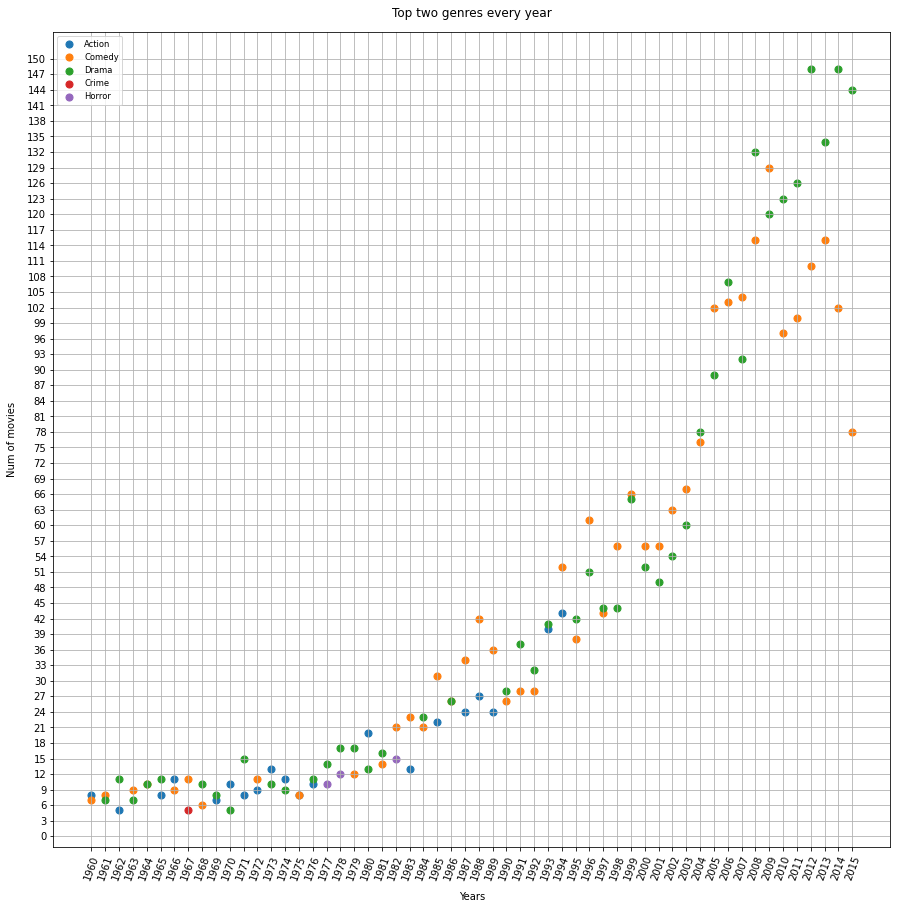

In [38]:
# all unique genres in our dataset
genres_1 = num_of_movies['genre'].unique()

# listing all years in our dataset
x_ticks = np.arange(1960, 2016)

# creating ticks for the y-axis
y_ticks = np.arange(0, 151, 3)

# changing the figure display size
plt.figure(figsize=(15, 15))

# plotting the top two genres of every year
for genre in genres_1:
    x_axis = num_of_movies[num_of_movies['genre'] == genre]['release_year']
    y_axis = num_of_movies[num_of_movies['genre'] == genre]['num_of_movies']
    plt.scatter(x_axis, y_axis, label=genre, s=50)
    
plt.xticks(ticks=x_ticks)
plt.yticks(ticks=y_ticks)

# rotating the labels on the x_axis to fit all labels
plt.xticks(rotation=70)

# adding labels to the x-axis, y_axis and title
plt.xlabel('Years', labelpad=10)
plt.ylabel('Num of movies', labelpad=10)
plt.title('Top two genres every year', pad=15)

# adding background grid to make it easier to get the results
plt.grid(True)

# plotting the legend
plt.legend(fontsize='small')

plt.show()

<a id='q2'></a>
### Do specific genres affect the budget?

In [39]:
# creating a new dataframe 'genre_budget_df' and wrangling it for more analysis
genre_budget_df = genre_df[['release_year', 'genre', 'budget']].copy()
genre_budget_df.drop(index=genre_budget_df[genre_budget_df['budget'] == 0].index, inplace=True)
genre_budget_df.drop(index=genre_budget_df[genre_budget_df['genre'] == 'nan'].index, inplace=True)

In [40]:
# creating a sub dataframes from 'genre_budget_df' and wrangling them to answer the 2nd question
genre_budget_df_1 = genre_budget_df[['genre', 'budget']].groupby('genre').mean().sort_values(by='budget', ascending=False).reset_index()

genre_budget_df_2 = genre_budget_df.groupby(['release_year', 'genre']).mean().sort_values(by='release_year').reset_index()

genre_budget_df_3 = genre_budget_df_2.groupby(['release_year', 'genre']).describe()['budget']['mean'].to_frame()
genre_budget_df_3.rename(columns={'mean': 'mean_budget'}, inplace=True)
genre_budget_df_3 = genre_budget_df_3['mean_budget'].groupby('release_year').nlargest(2).to_frame()
genre_budget_df_3.index = genre_budget_df_3.index.droplevel(0)
genre_budget_df_3 = genre_budget_df_3.reset_index()

In [41]:
# reformatting the budget column to be more readable
genre_budget_df_1['budget'].apply(float_formatting).head(3)

0    $64,771,523
1    $60,996,028
2    $51,821,337
Name: budget, dtype: object

<a id='fig2'></a>
## fig(2)

- ### total budget of each genre

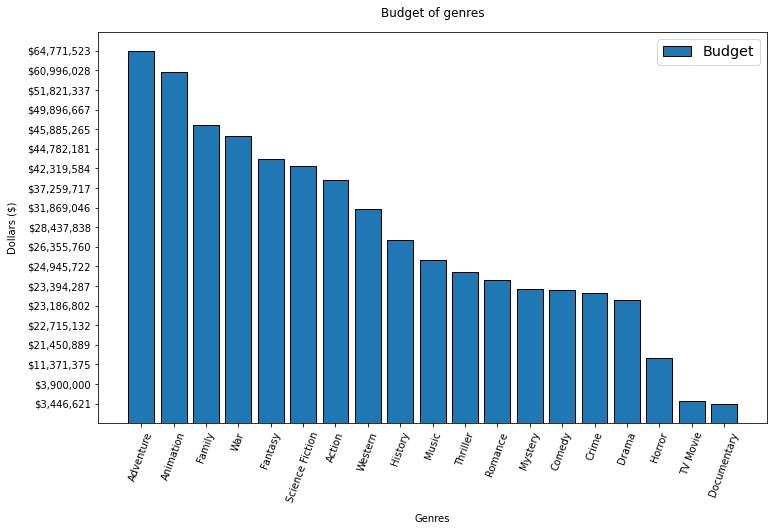

In [42]:
# that data of x and y axes
genre_x = genre_budget_df_1['genre']
budget_y = genre_budget_df_1['budget']

# creating lists of custom ticks to make the plot clear and easy to get results from
# using numpy to creat a linear spaced array
y_ticks = np.linspace(genre_budget_df_1['budget'].min(), genre_budget_df_1['budget'].max(), 19)[::-1]
# using the dollars format for y_axis
y_labels = genre_budget_df_1['budget'].apply(float_formatting)

# changing the figure display size
plt.figure(figsize=(12, 7.2))

# ploting the mean budget of genres as bar chart
plt.bar(genre_x, budget_y, label='Budget', edgecolor='black')

# rotating the labels on the x-axis to fit all labels
plt.xticks(rotation=70)

plt.yticks(ticks=y_ticks, labels=y_labels)

# adding labels to the x-axis, y-axis and title
plt.xlabel('Genres', labelpad=10)
plt.ylabel(r'Dollars ($)', labelpad=10)
plt.title('Budget of genres', pad=15)

# plotting the legend
plt.legend(fontsize='x-large')

plt.show()

<a id='fig3'></a>
## fig(3)

- ### yearly budget of each genre

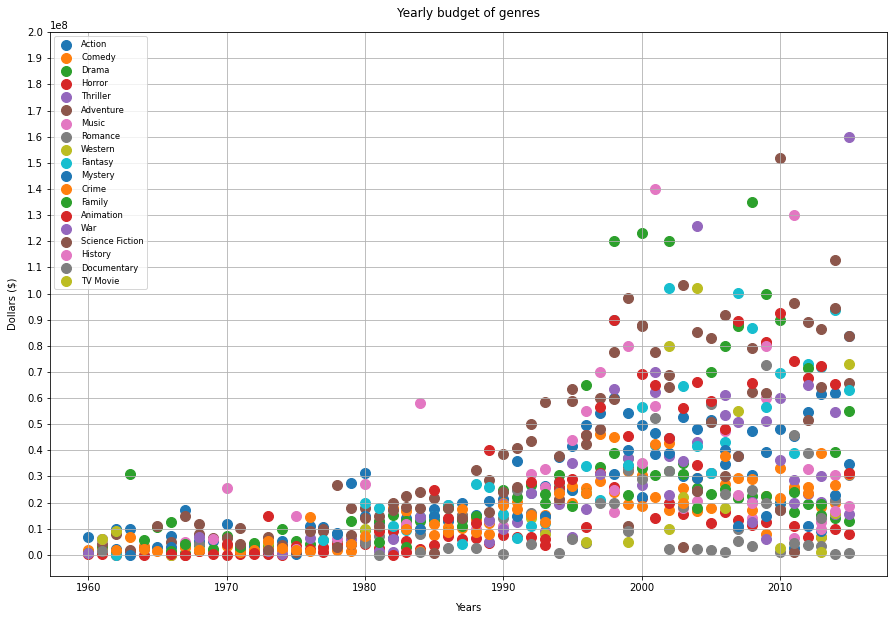

In [43]:
# the data of x_axis
genres_2 = genre_budget_df_2['genre'].unique()

# changing the figure display size
plt.figure(figsize=(15, 10))

# plotting the mean budget of each genre of every year
for genre in genres_2:
    years_x = genre_budget_df_2[genre_budget_df_2['genre'] == genre]['release_year']
    budget_y = genre_budget_df_2[genre_budget_df_2['genre'] == genre]['budget']
    plt.scatter(years_x, budget_y, label=genre, s=100)

# creating custom wider scale for y_axis
plt.yticks(ticks=np.arange(0, 200000001, 10000000))

# adding labels to the x-axis, y-axis and title
plt.xlabel('Years', labelpad=10)
plt.ylabel(r'Dollars ($)', labelpad=10)
plt.title('Yearly budget of genres', pad=15)

# adding background grid to make it easier to get the results
plt.grid(True)

# plotting the legend
plt.legend(fontsize='small')

plt.show()

## from the above chart we see it's hard to extract the needed information so we can do this instead:

<a id='fig4'></a>
## fig(4)

- ### yearly budget of top three genres

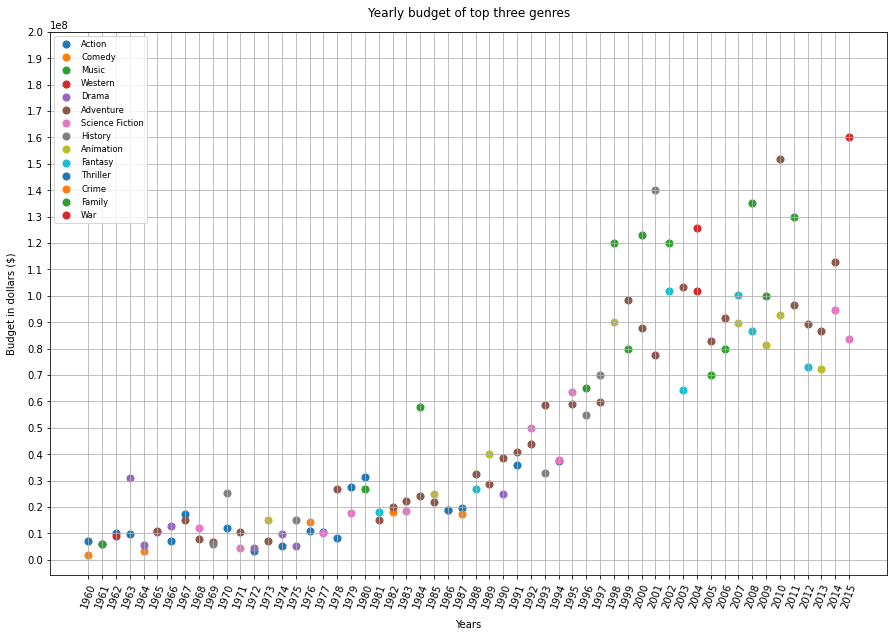

In [44]:
# the data of the x_axis
genres_3 = genre_budget_df_3['genre'].unique()

# listing all years in our dataset
ticks = np.arange(1960, 2016)

# changing the figure display size
plt.figure(figsize=(15, 10))

# plotting the mean budget of the top three genres of every year
for genre in genres_3:
    years_x_top = genre_budget_df_3[genre_budget_df_3['genre'] == genre]['release_year']
    budget_y_top = genre_budget_df_3[genre_budget_df_3['genre'] == genre]['mean_budget']
    plt.scatter(years_x_top, budget_y_top, label=genre, s=50)

# creating custom wider scale for y_axis
plt.yticks(ticks=np.arange(0, 200000001, 10000000))

plt.xticks(ticks=ticks)

# rotating the labels on the x-axis to fit all labels
plt.xticks(rotation=70)

# adding labels to the x-axis, y-axis and title
plt.xlabel('Years', labelpad=10)
plt.ylabel(r'Budget in dollars ($)', labelpad=10)
plt.title('Yearly budget of top three genres', pad=15)

# adding background grid to make it easier to get the results
plt.grid(True)

# plotting the legend
plt.legend(fontsize='small')

plt.show()

<a id='q3'></a>
### Which genres are most profitable from year to year?

In [45]:
# creating a new dataframe 'profit_df' to answer the 3rd question
profit_df = genre_df.groupby(['release_year', 'genre']).max().sort_values(by=['release_year', 'profit'],
                                                              ascending=[True, False]).astype(float).reset_index()

In [46]:
profit_df

,release_year,genre,budget,profit
0,1960,Action,12000000.0,48000000.0
1,1960,Drama,806948.0,31193052.0
2,1960,Comedy,3000000.0,22000000.0
3,1960,Adventure,0.0,0.0
4,1960,Crime,0.0,0.0
...,...,...,...,...
839,2015,Music,0.0,13603453.0
840,2015,History,30000000.0,13192457.0
841,2015,Documentary,1000000.0,8413144.0
842,2015,TV Movie,0.0,0.0


<a id='fig5'></a>
## fig(5)

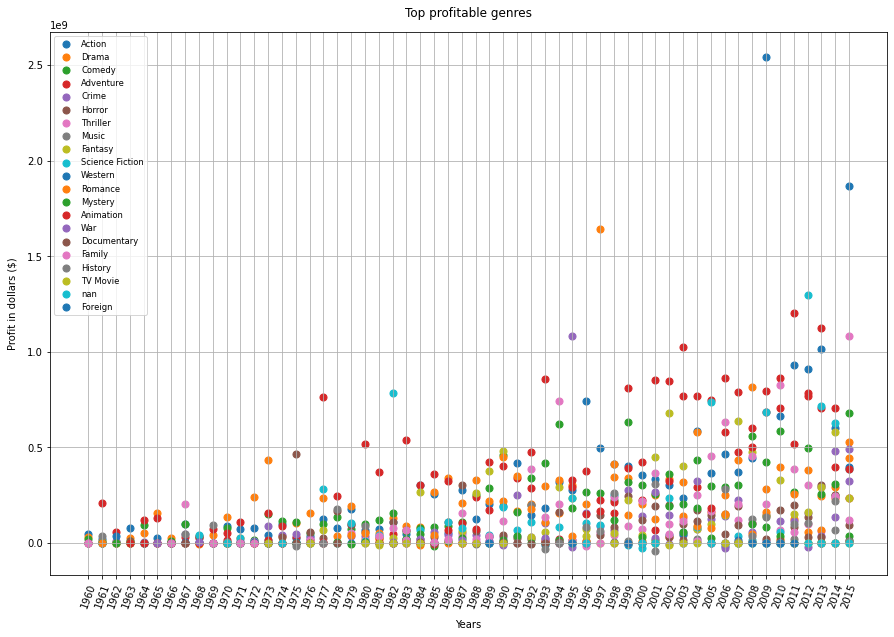

In [47]:
# all unique genres in our dataset
genres_4 = profit_df['genre'].unique()

# listing all years in our dataset
ticks = np.arange(1960, 2016)

# changing the figure display size
plt.figure(figsize=(15, 10))

# plotting the mean profit of each genre every year
for genre in genres_4:
    x_axis_2 = profit_df[profit_df['genre'] == genre]['release_year']
    y_axis_2 = profit_df[profit_df['genre'] == genre]['profit']
    plt.scatter(x_axis_2, y_axis_2, label=genre, s=50)
    
plt.xticks(ticks=ticks)

# rotating the labels on the x-axis to fit all labels
plt.xticks(rotation=70)

# adding labels to the x-axis, y-axis and title
plt.xlabel('Years', labelpad=10)
plt.ylabel(r'Profit in dollars ($)', labelpad=10)
plt.title('Top profitable genres', pad=15)

# adding background grid to make it easier to get the results
plt.grid(True)

# plotting the legend
plt.legend(fontsize='small')

plt.show()

<a id='q4'></a>
### What kinds of properties are associated with movies that have high revenues?

In [48]:
# creating a new dataframe 'properties_df' to answer the 4th question
properties_df = copy_df[['release_year', 'runtime', 'cast', 'director', 'vote_count', 'vote_average', 'budget',
                         'revenue']].copy()

In [49]:
# wrangling the dataframe to get ready for analysis
properties_df['cast'] = properties_df['cast'].str.split('|').str[0]
properties_df['director'] = properties_df['director'].str.split('|').str[0]

- droping movies with 0 revenue to avoid misleading anlysis

In [50]:
# removing outliers
properties_df.drop(index=properties_df[properties_df['revenue'] == 0].index, inplace=True)

In [51]:
properties_df.groupby('release_year').mean().head()

,runtime,vote_count,vote_average,budget,revenue
release_year,,,,,
1960,118.000000,269.571429,6.985714,2.972421e+06,2.071500e+07
1961,132.500000,191.400000,6.620000,3.863700e+06,3.377202e+07
1962,135.666667,181.444444,6.611111,4.383333e+06,2.395332e+07
1963,148.000000,239.428571,6.771429,8.730714e+06,2.677214e+07
1964,119.875000,306.000000,6.987500,4.241895e+06,4.262272e+07


- the relation between the directors and other properties

In [52]:
# creating a sub dataframe for the directors and wrangling it to fit the analysis
direcotrs_df = properties_df.copy()
direcotrs_df['director'] = direcotrs_df['director'].dropna()
direcotrs_df = direcotrs_df.groupby('director').mean().sort_values(by='revenue')[['budget', 'revenue']]
direcotrs_df.reset_index(inplace=True)
direcotrs_df.set_index('director', inplace=True)

In [53]:
direcotrs_df.tail(5)

,budget,revenue
director,,
Pete Docter,175000000.0,8.537086e+08
David Yates,193750000.0,1.038574e+09
Irwin Winkler,22000000.0,1.106280e+09
Kyle Balda,74000000.0,1.156731e+09
Chris Buck,150000000.0,1.274219e+09


<a id='fig6'></a>
## fig(6)

<Figure size 3000x2000 with 0 Axes>

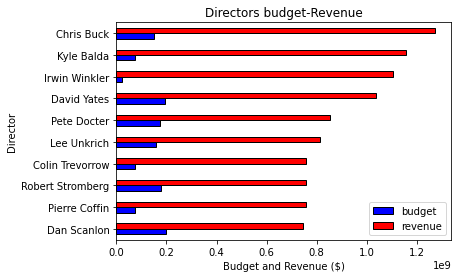

In [54]:
# changing the figure display size
plt.figure(figsize=(15, 10), dpi=200)

# plotting the top 10 directors with highest mean revenue
direcotrs_df.tail(10).plot.barh(color=['b', 'r'], edgecolor='black')

# adding labels to the x-axis, y-axis and title
plt.title('Directors budget-Revenue')
plt.ylabel('Director')
plt.xlabel(r'Budget and Revenue ($)')

plt.show()

- the relation between the first_cast and other properties

In [55]:
# creating a sub dataframe for the casts and wrangling it to fit the analysis
cast_df = properties_df.copy()
cast_df['cast'] = cast_df['cast'].dropna()
cast_df = cast_df.groupby('cast').mean().sort_values(by='revenue')[['budget', 'revenue']]
cast_df.reset_index(inplace=True)
cast_df.set_index('cast', inplace=True)

In [56]:
cast_df.tail(5)

,budget,revenue
cast,,
William Moseley,180000000.0,7.488070e+08
Jonathan Taylor Thomas,45000000.0,7.882418e+08
Henry Thomas,10500000.0,7.929106e+08
Amy Poehler,175000000.0,8.537086e+08
Chris Pratt,160000000.0,1.143421e+09


<a id='fig7'></a>
## fig(7)

<Figure size 3000x2000 with 0 Axes>

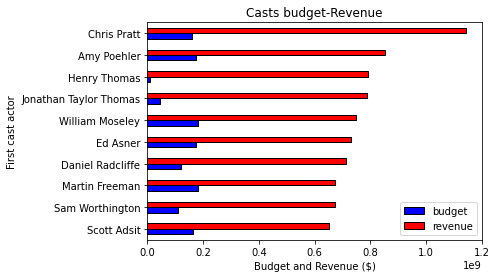

In [57]:
# changing the figure display size
plt.figure(figsize=(15, 10), dpi=200)

# plotting the top 10 actors with highest mean revenue
cast_df.tail(10).plot.barh(color=['b', 'r'], edgecolor='black')

# adding labels to the x-axis, y-axis and title
plt.title('Casts budget-Revenue')
plt.ylabel('First cast actor')
plt.xlabel(r'Budget and Revenue ($)')

plt.show()

<a id='q5'></a>
### Is there any progress in the movies industry across the years?

In [58]:
# creating a new dataframe 'progress_df' to answer the 5th question
progress_df = profit_df.groupby('release_year').sum()

In [59]:
progress_df.head()

,budget,profit
release_year,,
1960,16826948.0,101193052.0
1961,31737000.0,289183188.0
1962,46912126.0,112399720.0
1963,64081500.0,123815401.0
1964,28700161.0,277537566.0


<a id='fig8'></a>
## fig(8)

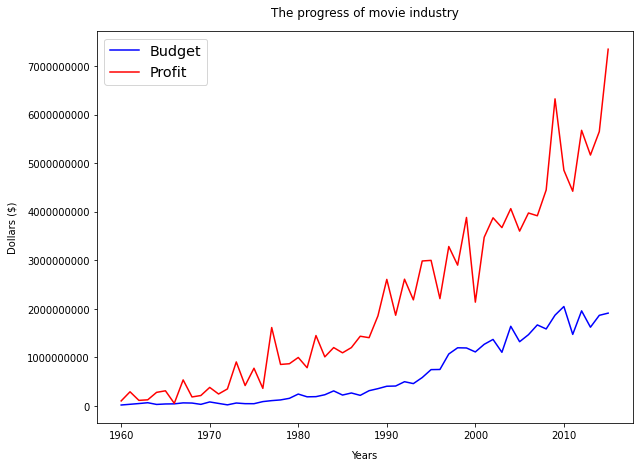

In [60]:
# the data for x and y axes
years_x = profit_df['release_year'].unique()
profit_y = progress_df['profit']
budget_y = progress_df['budget']

# changing the figure display size
plt.figure(figsize=(9.6, 7.2))

# ploting the mean budget and profit along the years
plt.plot(years_x, budget_y, color='b', label='Budget')
plt.plot(years_x, profit_y, color='r', label='Profit')

plt.ticklabel_format(useOffset=False, style='plain')

# adding labels to the x-axis, y-axis and title
plt.xlabel('Years', labelpad=10)
plt.ylabel(r'Dollars ($)', labelpad=10)
plt.title('The progress of movie industry', pad=15)

# plotting the legend
plt.legend(fontsize='x-large')

plt.show()